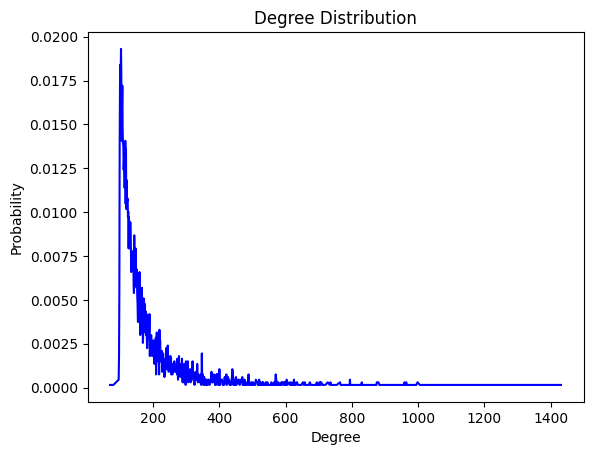

In [39]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import pandas as pd

def draw(G):
    nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=500)
    plt.show()

def decrement(f):
    if f > 1:
        return f - 1
    return f

def assign_fitness(initial_nodes, n, f):
    fitness = np.ones(n)
    return fitness
    fitness[0:initial_nodes] = f  # Assign f to all leaf nodes
    f = decrement(f)
    
    # Divide the new nodes into f groups, assign f and decrease f when group changes
    group_size = (n - initial_nodes) // f
    
    for i in range(initial_nodes, n):
        fitness[i] = f
        if (i - initial_nodes + 1) % group_size == 0 and f > 1:
            f = decrement(f)

    return fitness

def bianconi_barabasi(n, m, fitness, initial_nodes):
    G = nx.star_graph(initial_nodes - 1)  # Start with a star graph with initial_nodes (1 central node and initial_nodes-1 leaf nodes)
    
    # draw(G)

    # Set the fitness of the central node and leaf nodes
    for i in range(initial_nodes):
        G.nodes[i]['fitness'] = fitness[i]
        
    # Add random edge weights to the initial star graph
    for u, v in G.edges():
        G.edges[u, v]['weight'] = random.randint(1, 10)

    for node in range(initial_nodes, n):
        # Compute the probability of each existing node to gain a new link
        total_fitness_degree = sum(G.nodes[i]['fitness'] * G.degree(i) for i in G.nodes())
        probabilities = {}
        for i in G.nodes():
            probabilities[i] = (G.nodes[i]['fitness'] * G.degree(i)) / total_fitness_degree

        selected_nodes = random.choices(list(probabilities.keys()), list(probabilities.values()), k=m)

        # Add the new node and create links to the selected nodes
        G.add_node(node, fitness=fitness[node])
        for selected_node in selected_nodes:
            G.add_edge(node, selected_node, weight=random.randint(1, 10))

    return G

def plot_degree_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_count = {}
    for degree in degree_sequence:
        degree_count[degree] = degree_count.get(degree, 0) + 1

    degrees, counts = zip(*degree_count.items())

    # Normalize the counts
    total_counts = sum(counts)
    normalized_counts = [count / total_counts for count in counts]

    # Plot the degree distribution as a line graph
    plt.figure()
    plt.plot(degrees, normalized_counts, linestyle='-', color='b')

    plt.title("Degree Distribution")
    plt.ylabel("Probability")
    plt.xlabel("Degree")

    plt.show()
    
# Constants
NUMBER_OF_CARRIERS = 6684 # total number of carriers in united states
ATTACHMENT_EDGES = 100 # number of edges any new node gets attached to
NODES_IN_INITIAL_GRAPH = 100

# Parameters
n = NUMBER_OF_CARRIERS  # Number of nodes
m = ATTACHMENT_EDGES    # Number of links a new node forms
initial_nodes = NODES_IN_INITIAL_GRAPH  # Number of nodes in the initial star graph

f = n / initial_nodes  # Calculate f

# Generate fitness values for the nodes
node_fitness = assign_fitness(initial_nodes, n, f)

# print(node_fitness)
# print(len(node_fitness))

# Generate the graph
G = bianconi_barabasi(n, m, node_fitness, initial_nodes)

# draw(G)

plot_degree_distribution(G)
